In [1]:
import numpy as np
import scipy.stats as st

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]

# Continuous random variables

### Univariate  (one dimensional)

By continous random variables we will understand variables with have a connected subset of $S\in \mathbb{R}$ e.g. an interval as the outcome set. 

When the set of the outcomes is not countable _i.e._ we cannot enumerate them, we cannot  specify probability of the event by adding probabilities of elementary events it contains.  Actually for most of the interesting continous random variables the probability of a single outcome is zero

$$P(X=x) = 0$$

### Cummulative distribution function

However we can ask for the probability that the outcome is smaller then some number:

$$F_X(x) = P(X\le x)$$

This is called a cummulative distribution function (cdf) or _cummulant_.

#### Problem

Let $X$  be an random variable taking values in the  interval $[a,b)$. Please show that
$$
F_X(a) = 0 \quad\text{and}\quad  \lim_{x\rightarrow b}F_X(x) = 1
$$

### Probability density function

We can also ask for the probability that the outcome lies in a small interval $\Delta x$

$$P(x<X\le x+\Delta x)$$

For small intervals and "well behaved" random variables we expect that this probability will be proportional to $\Delta x$, so let's take the ratio and go to the limit $\Delta x\rightarrow 0$

$$\frac{P(x<X<x+\Delta x)}{\Delta x}\underset{\Delta x\rightarrow 0}{\longrightarrow} P_X(x)$$

If this limit exists it's called probability density function (pdf).  

There is a relation between cdf and pdf  

$$ P_X(x) =\frac{\text{d}}{\text{d}x}F_X(x)\qquad F_X(x) = \int\limits_{-\infty}^x P_X(x')\text{d}x'$$

Most of the definitions and properties of the probability mass function apply to probability density function with summation changed to integral _e.g._

$$E_X[f(X)]\equiv \int\text{d}x f(x) P(x)$$

### Multivariate

When the outcome set of the random variable is some connected subset of $\mathbb{R}^n$ we are talking about _multivariate_ random variables. The probability density function is defined in the same way:

$$P_X(x) \equiv \lim_{\Delta x_{i}\rightarrow 0}\frac{P(x_1<X_1<x_1+\Delta x_1,\ldots,x_n<X_n<x_n+\Delta x_n )}{\Delta x_1\cdots \Delta x_n}$$

One can generalize the cummulatife distribution function in the same way, but it is less commonly used. 

## Some useful continuous random variables

### Normal distribution

Probably  the most known, if not the only known, continuous distribution is the _normal_ or Gaussian distribution. It is characterised by its mean $\mu$  and  variance $\sigma^2$. Its probability density function is

$$P(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\displaystyle -\frac{(x-\mu)^2}{2\sigma^2}}$$

and it has a characteristic bell-like shape

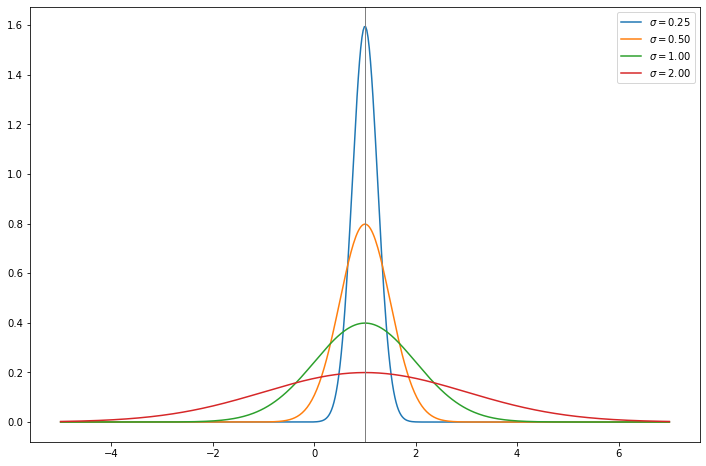

In [3]:
xs = np.linspace(-5,7,500)
for s in [0.25, 0.5, 1,2]:
    plt.plot(xs,st.norm.pdf(xs, loc=1, scale=s), label="$\\sigma = {:4.2f}$".format(s));
plt.axvline(1, c='grey', linewidth=1);
plt.legend();

The prevalence of this  random variable can be attributed to central limit theorem that states that, under some mild assumptions,  the sum of independent random variables  approaches the normal random variable as the number of variables tends to infinity. 

Another feature  of the normal distribution is that it is the distribution with highest entropy with given mean and variance. 

As you can see on the probability density function $P_X(x)$ is not restricted to be less then one. That's because this is a _density_. We  can meaningfully only ask about probability of $X$ having an outcome in an interval  which is given by the area under a fragment of the curve

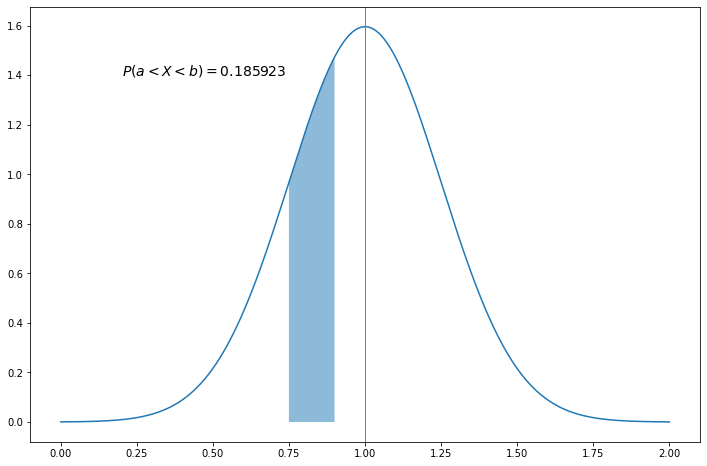

In [4]:
distrib  = st.norm(loc=1, scale=0.25)
a = 0.75
b = 0.90
xs = np.linspace(0,2,500)
ab = np.linspace(a,b,100)

plt.plot(xs,distrib.pdf(xs));
plt.fill_between(ab,distrib.pdf(ab), alpha=0.5 )
plt.axvline(1, c='grey', linewidth=1);
area = distrib.cdf(b)-distrib.cdf(a)
plt.text(0.2, 1.4, "$P(a<X<b) = {:2f}$".format(area), fontsize=14);

In [5]:
n=100000
sample = distrib.rvs(size=n)
( (a<sample) & (sample<b)).sum()/n

0.18585

The area was calculated using the cumulative distribution function

$$P(a<X<b)=F_X(b)-F_X(a)$$

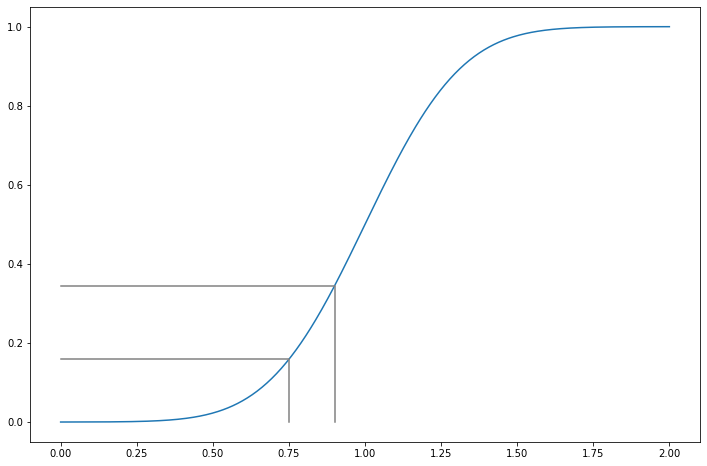

In [6]:
xs = np.linspace(0,2,500)
plt.plot(xs,distrib.cdf(xs));
plt.plot([a,a,0],[0,distrib.cdf(a), distrib.cdf(a)], c='grey')
plt.plot([b,b,0],[0,distrib.cdf(b),distrib.cdf(b)], c='grey');

The normal distribution generalizes easilly to more dimesions

$$\newcommand{\b}[1]{\mathbf{#1}}$$
$$P(\b{x}|\pmb\mu, \pmb\Sigma) = 
\frac{1}{(2\pi)^{\frac{n}{2}}}
\frac{1}{\sqrt{\det \pmb{\Sigma}}}
e^{\displaystyle -\frac{1}{2}(\b{x}-\pmb\mu)^T \pmb\Sigma^{-1}(\b{x}-\pmb{\mu})}$$

where $\pmb\Sigma$ is some _positive definite_ covariance matrix matrix and $\pmb\mu$ is a vector of mean values. 

Show that when matrix $\pmb\Sigma$ is 

### Beta distribution

The  [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) has two parameters  $\alpha$ and $\beta$  and its probability density function is

$$P(x|\alpha,\beta) =  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
x^{\alpha-1}(1-x)^{\beta-1},\quad 0\leq x\leq 1
$$

Its importance stems from  the fact that it is a _conjugate_ prior to Bernoulli distribution so it is used to set the "probability on probability". You will learn more about this  in bayesian_analysis notebook. 

Here are plots of the probability density function for some values of $\alpha=\beta$

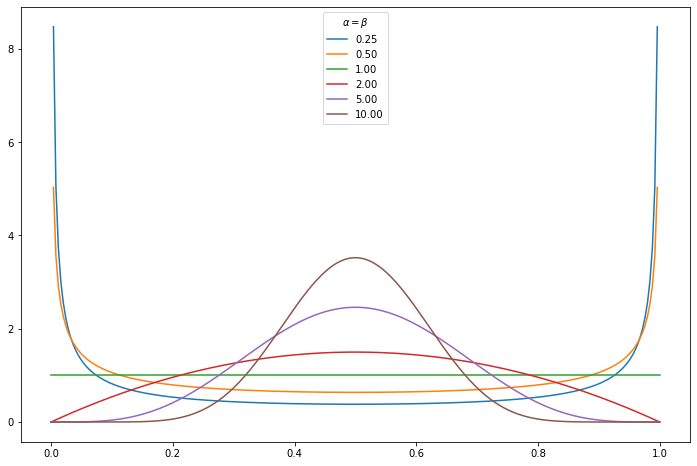

In [7]:
xs =np.linspace(0,1,250)
for a in [0.25,0.5,1,2,5,10]:
    ys = st.beta(a,a).pdf(xs)
    plt.plot(xs,ys, label='%4.2f' %(a,))
plt.legend(loc='best', title='$\\alpha=\\beta$');

And here for some values of $\alpha\neq\beta$

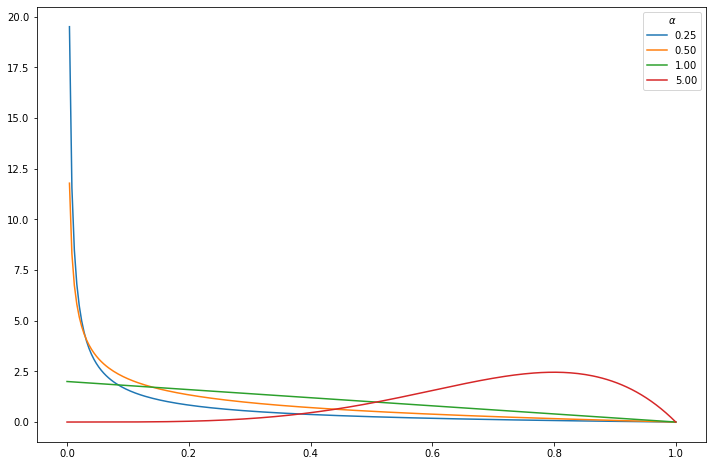

In [8]:
xs =np.linspace(0,1,250)
for a in [0.25,0.5,1,5]:
    ys = st.beta(a,2.0).pdf(xs)
    plt.plot(xs,ys, label='%4.2f' %(a,))
plt.legend(loc=1, title='$\\alpha$');

It can be more convenient to parametrise  Beta distrubution by its mean and variance. The mean and variance of Beta distribution are 

$$\mu = \frac{\alpha}{\alpha+\beta}\quad\text{and}\quad \sigma^2=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

Introducing a new auxiliary variable

$$\nu = \alpha+\beta$$

we have 

$$\alpha = \mu \nu,\quad \beta = (1-\mu)\nu,\quad \sigma^2=\frac{\mu(1-\mu)}{\nu +1} $$

so

$$\nu=\frac{\mu(1-\mu)}{\sigma^2}-1$$

and finally

$$\alpha = \mu \left(\frac{\mu(1-\mu)}{\sigma^2}-1\right)\quad\text{and}\quad\beta = (1-\mu) \left(\frac{\mu(1-\mu)}{\sigma^2}-1\right)$$